In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile

zip_path = "archive (1).zip"
extract_dir = "/content/ML"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


import os
for root, dirs, files in os.walk(extract_dir):
    print(root)
    break

/content/ML


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root="/content/ML/Training", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/ML/Testing", transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print("Class labels:", train_dataset.classes)
print("Class labels:", test_dataset.classes)

Class labels: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Class labels: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
# Loading the dataset
from datasets import load_dataset
train_dataset = load_dataset("imagefolder", data_dir="/content/ML/Training")
test_dataset = load_dataset("imagefolder", data_dir="/content/ML/Testing")

train_dataset = train_dataset["train"]
test_dataset = test_dataset["train"]

Resolving data files:   0%|          | 0/2870 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/394 [00:00<?, ?it/s]

In [ ]:
def transform_example(example):
    example["pixel_values"] = transform(example["image"])
    return example

# Apply it and remove the original 'image' column
train_dataset = train_dataset.map(transform_example)
test_dataset = test_dataset.map(transform_example)

Map:   0%|          | 0/2870 [00:00<?, ? examples/s]

Map:   0%|          | 0/394 [00:00<?, ? examples/s]

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
from datasets import load_dataset
from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = load_dataset("imagefolder", data_dir="/content/ML/Training")
test_dataset = load_dataset("imagefolder", data_dir="/content/ML/Testing")


Resolving data files:   0%|          | 0/2870 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/394 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# plt.imshow(dataset["train"][222])
train_dataset["train"].features["label"].names

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_dataloader))

for i in range(5):
    img = images[i].permute(1, 2, 0)
    label = train_dataset.classes[labels[i]]
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
plt.show()


In [ ]:
train_dataset

In [ ]:
# Load model

from transformers import AutoImageProcessor, AutoModelForImageClassification

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model = AutoModelForImageClassification.from_pretrained(checkpoint, num_labels = 4)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def transform_examples(example):
    pixel_values = [transform(img) for img in example["image"]]
    return {"pixel_values": pixel_values, "labels": example["label"]}

train_dataset = train_dataset.with_transform(transform_examples)

test_dataset = test_dataset.with_transform(transform_examples)

AttributeError: 'ImageFolder' object has no attribute 'with_transform'

In [ ]:
from sklearn.metrics import accuracy_score

def compute_metrics(p):
    preds, labels = p
    preds = preds.argmax(axis=-1)
    accuracy = accuracy_score(labels, preds)
    return {"accuracy": accuracy}


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
	output_dir = "./results",
  eval_strategy = "epoch",
  per_device_train_batch_size=32,
  per_device_eval_batch_size=32,
  num_train_epochs=10,
  label_names=['labels'],
  learning_rate=5e-5,
  logging_steps = 100,
  metric_for_best_model="accuracy"
)

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = test_dataset,
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
import wandb
wandb.init(mode="disabled")
os.environ["WANDB_DISABLED"] = "true"

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.816462,0.741117
2,0.568000,0.746056,0.774112
3,0.132200,0.991995,0.756345
4,0.067400,0.932131,0.779188
5,0.039100,0.945849,0.779188
6,0.023700,1.014609,0.784264
7,0.017800,1.041294,0.781726
8,0.015400,1.062212,0.781726
9,0.014100,1.076615,0.781726
10,0.013400,1.080245,0.781726


Exception ignored in: <function _xla_gc_callback at 0x78cd49dd9580>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x78cd49dd9580>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


TrainOutput(global_step=900, training_loss=0.09901958651012845, metrics={'train_runtime': 4046.7485, 'train_samples_per_second': 7.092, 'train_steps_per_second': 0.222, 'total_flos': 2.2240599683162112e+18, 'train_loss': 0.09901958651012845, 'epoch': 10.0})

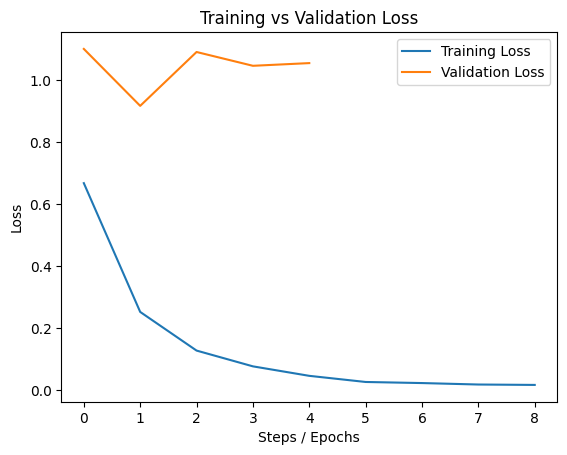

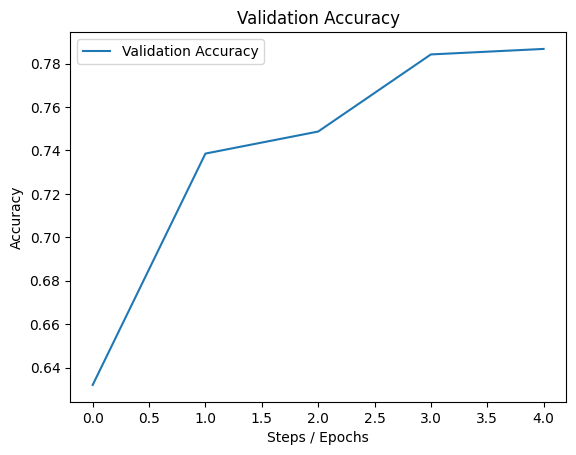

In [ ]:
import matplotlib.pyplot as plt

train_losses = trainer.state.log_history
eval_losses = [log for log in train_losses if 'eval_loss' in log]

train_loss_values = [log['loss'] for log in train_losses if 'loss' in log]
eval_loss_values = [log['eval_loss'] for log in eval_losses]

# Plotting the loss values
plt.plot(range(len(train_loss_values)), train_loss_values, label="Training Loss")
plt.plot(range(len(eval_loss_values)), eval_loss_values, label="Validation Loss")
plt.xlabel("Steps / Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

train_accuracy = [log['eval_accuracy'] for log in eval_losses]
plt.plot(range(len(train_accuracy)), train_accuracy, label="Validation Accuracy")
plt.xlabel("Steps / Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.show()

In [ ]:
test_results = trainer.evaluate(eval_dataset=test_dataset)
print(f"Evaluation results: {test_results}")

NameError: name 'trainer' is not defined

In [ ]:
trainer.save_model('./fine_tuned_model')

In [ ]:
pip install datasets

In [ ]:
# imports needed
import matplotlib.pyplot as plt
import wandb
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
from transformers import AutoImageProcessor, AutoModelForImageClassification
from datasets import load_dataset
from torchvision import datasets, transforms
import torch

from PIL import Image


In [ ]:
model = AutoModelForImageClassification.from_pretrained("model")
#processor = AutoImageProcessor.from_pretrained("./fine_tuned_model")

SafetensorError: Error while deserializing header: HeaderTooLarge

### Use Model to Test individual images

In [ ]:
sample_image

In [ ]:
import torch
from PIL import Image

def test_indiv_image(im_path):
  sample_image = Image.open(im_path)
  sample_image = sample_image.convert("RGB")
  transformed_image = transform(sample_image).unsqueeze(0)

  model.eval()
  with torch.no_grad():
      outputs = model(transformed_image)
      logits = outputs.logits

  predicted_class = logits.argmax(dim=-1).item()
  probs = torch.nn.functional.softmax(logits, dim=1)
  top_probability = torch.max(probs)
  probs = probs.squeeze().tolist()

  class_labels = train_dataset["train"].features["label"].names
   #["glioma tumor", "meningioma tumor", "no tumor", "pituitary tumor"]
  predicted_label = class_labels[predicted_class]

  print(f"The prediction is class {predicted_class} ({predicted_label}) with probability {top_probability}")

  print(f"{'Class':<16} | {'Probability'}")
  print("-" * 30)
  for name, prob in zip(class_labels, probs):
      print(f"{name:<16} | {prob:.4f}")
  return predicted_class, predicted_label

In [ ]:
im_path = "/content/sample_pit.jpeg"
pred_class, label = test_indiv_image(im_path)

The prediction is class 3 (pituitary_tumor) with probability 0.960949182510376
Class            | Probability
------------------------------
glioma_tumor     | 0.0036
meningioma_tumor | 0.0094
no_tumor         | 0.0260
pituitary_tumor  | 0.9609
